<a href="https://colab.research.google.com/github/VictorDreke/Data-Science-for-Finance/blob/master/AppleStockARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LOADING LIBRARIES


In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# Getting Apple stock quote from 2012/01/01 to 2020/05/16
dataset = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-05-16')
# Show the data
dataset

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2020-05-11,317.049988,307.239990,308.100006,315.010010,36405900.0,315.010010
2020-05-12,319.690002,310.910004,317.829987,311.410004,40575300.0,311.410004
2020-05-13,315.950012,303.209991,312.149994,307.649994,50155600.0,307.649994


## Plot graph of Apple Stock

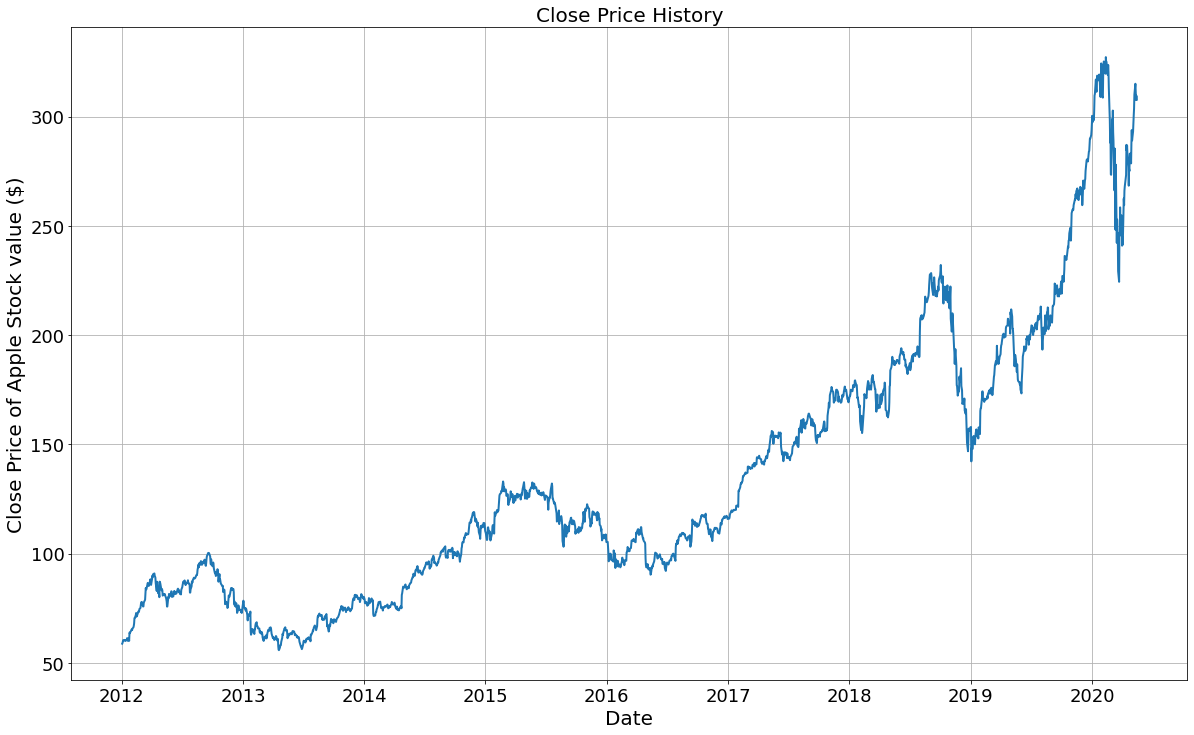

In [12]:
plt.figure(figsize=(20,12))
plt.xlabel("Date", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel("Close Price of Apple Stock value ($)", fontsize=20)
plt.title('Close Price History', fontsize=20)
plt.plot(dataset['Close'], linewidth=2)
plt.grid()

## Determining rolling statistics
In this stage we make sure that the datais stacionary. Therefore, the data should have a constant mean and standard deviation. It is clear that data does not have a constant mean so we analize the in differents segments.

In [18]:
rolmean = dataset['Close'].rolling(window=45).mean()

rolstd = dataset['Close'].rolling(window=45).std()
print(rolmean, rolstd)


Date
2012-01-03           NaN
2012-01-04           NaN
2012-01-05           NaN
2012-01-06           NaN
2012-01-09           NaN
                 ...    
2020-05-11    269.563555
2020-05-12    270.568888
2020-05-13    271.064666
2020-05-14    271.822666
2020-05-15    273.144444
Name: Close, Length: 2106, dtype: float64 Date
2012-01-03          NaN
2012-01-04          NaN
2012-01-05          NaN
2012-01-06          NaN
2012-01-09          NaN
                ...    
2020-05-11    21.977472
2020-05-12    22.836641
2020-05-13    23.399834
2020-05-14    24.086840
2020-05-15    24.392810
Name: Close, Length: 2106, dtype: float64


## Plot rolling statistics 
This way we make that selected window is correct.

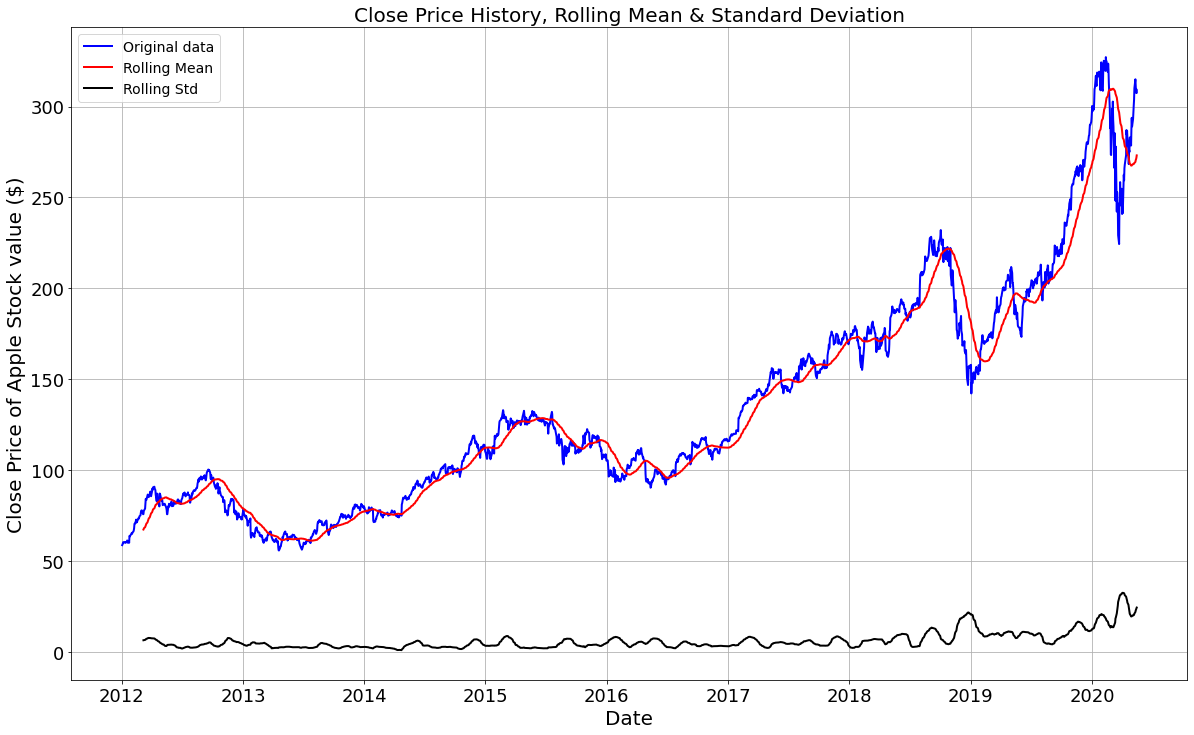

In [19]:
plt.figure(figsize=(20,12))
plt.xlabel("Date", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel("Close Price of Apple Stock value ($)", fontsize=20)
plt.title('Close Price History, Rolling Mean & Standard Deviation', fontsize=20)
original = plt.plot(dataset['Close'], color='blue', label='Original data', linewidth=2)
mean = plt.plot(rolmean, color='red', label='Rolling Mean', linewidth=2)
std = plt.plot(rolstd, color='black', label='Rolling Std', linewidth=2)
plt.legend(loc='best', fontsize=14)
plt.grid()
plt.show(block=False)

## Performing Dickey-Fuller test:
This test gives information about the suitability of the data for forescating. In this case, the null hypothesis is the stationarity o fthe data.
Note:
 

*   If p-value > alpha: Fail to reject the null hypothesis
*   If p-value <= alpha reject the null hypothesis


*   If test statistic < critical value: Fail to reject the null hypothesis
*   If test statistic >= critical value: Reject the null hypothesis.






In [22]:
from statsmodels.tsa.stattools import adfuller

print('Result of Dickey-Fuller Test:')
DFtest = adfuller(dataset['Close'], autolag='AIC')

DFoutput = pd.Series(DFtest[0:4], index=['test Statistic', 'p-value', 'Flags used', 'Number of Observation used'])
for key, value in DFtest[4].items():
  DFoutput['Critical value (%s)'%key] = value

print(DFoutput)

Result of Dickey-Fuller Test:
test Statistic                   0.427263
p-value                          0.982486
Flags used                      26.000000
Number of Observation used    2079.000000
Critical value (1%)             -3.433499
Critical value (5%)             -2.862931
Critical value (10%)            -2.567511
dtype: float64


## Estimating trend

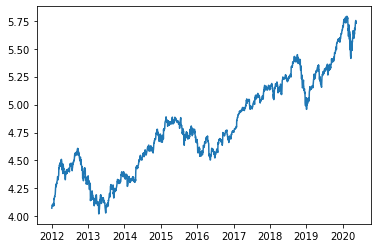

In [24]:
dataset_log = np.log(dataset['Close'])
plt.plot(dataset_log)

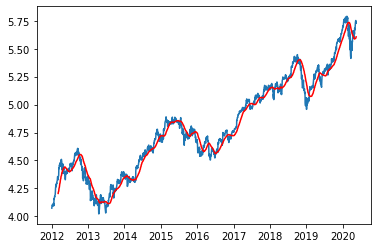

In [26]:
moving_average = dataset_log.rolling(window=45).mean()
moving_std = dataset_log.rolling(window=45).std()
plt.plot(dataset_log)
plt.plot(moving_average, color='red')

In [31]:
# Data preparation. 
# In this case to make the trend stationary, we restthe data minus the moving average.
dataset_log_minus_moving_average = dataset_log - moving_average
dataset_log_minus_moving_average.head(12)

# Remove NaN values
dataset_log_minus_moving_average.dropna(inplace=True)
# dataset_log_minus_moving_average.head(45)

In [32]:
from statsmodels.tsa.stattools import adfuller
def test_stacionarity(timeseries, wdw=45):

  # Determing rolling statistics
  moving_average = timeseries.rolling(window=wdw).mean()
  moving_std = timeseries.rolling(window=wdw).std()

  # Plot rolling statistics
  plt.figure(figsize=(20,12))
  plt.xlabel("Date", fontsize=20)
  plt.xticks(fontsize=18)
  plt.yticks(fontsize=18)
  plt.ylabel("Close Price of Apple Stock value ($)", fontsize=20)
  plt.title('Close Price History, Rolling Mean & Standard Deviation', fontsize=20)
  original = plt.plot(timeseries, color='blue', label='Original data', linewidth=2)
  mean = plt.plot(moving_average, color='red', label='Rolling Mean', linewidth=2)
  plt.legend(loc='best', fontsize=14)
  plt.grid()
  plt.show(block=False)

  # Perform Dickey-Fuller test:
  print('Results of Dickey-Fuller test:')
  DFtest = adfuller(timeseries, autolag='AIC')
  DFoutput = pd.Series(DFtest[0:4], index=['test Statistic', 'p-value', 'Flags used', 'Number of Observation used'])
  for key, value in DFtest[4].items():
    DFoutput['Critical value (%s)'%key] = value
  print(DFoutput)
  




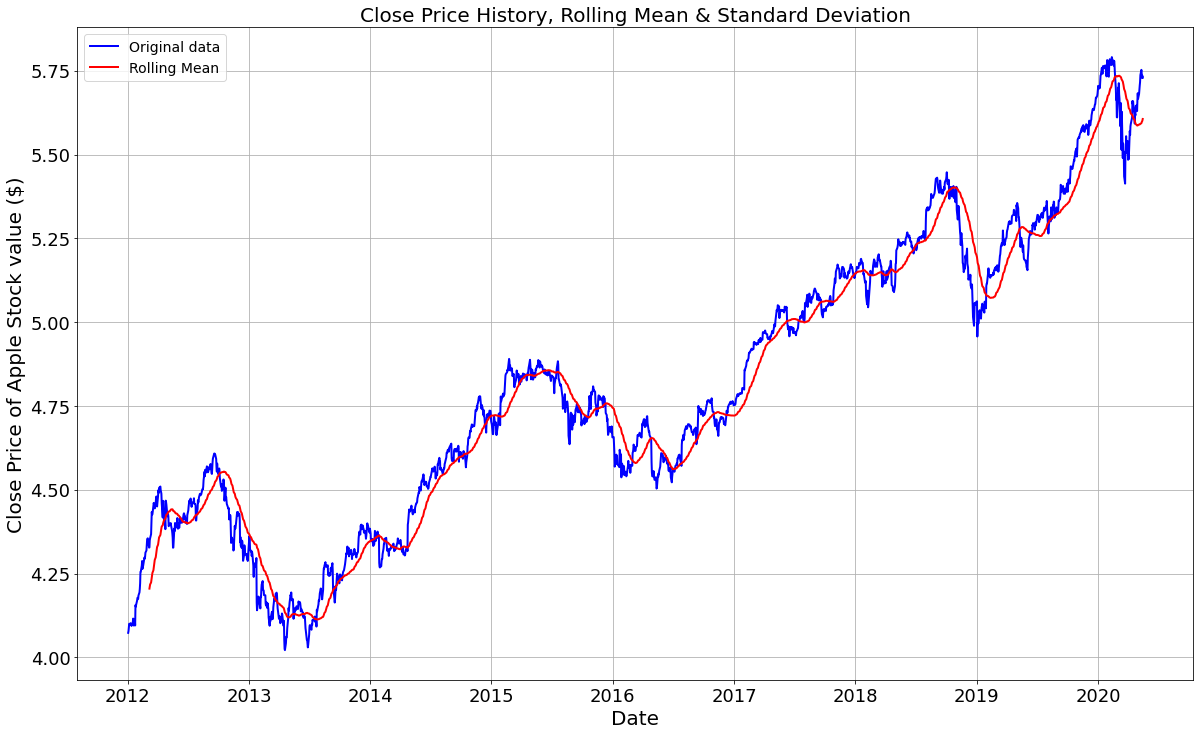

Results of Dickey-Fuller test:
test Statistic                  -0.347845
p-value                          0.918449
Flags used                      15.000000
Number of Observation used    2090.000000
Critical value (1%)             -3.433483
Critical value (5%)             -2.862924
Critical value (10%)            -2.567507
dtype: float64


In [33]:
test_stacionarity(dataset_log, wdw=45)